   userid  version  sum_gamerounds  retention_1  retention_7
0     116  gate_30               3        False        False
1     337  gate_30              38         True        False
2     377  gate_40             165         True        False
3     483  gate_40               1        False        False
4     488  gate_40             179         True         True
version
gate_30    52.456264
gate_40    51.298776
Name: sum_gamerounds, dtype: float64
Version with the highest average sum of game rounds: gate_30


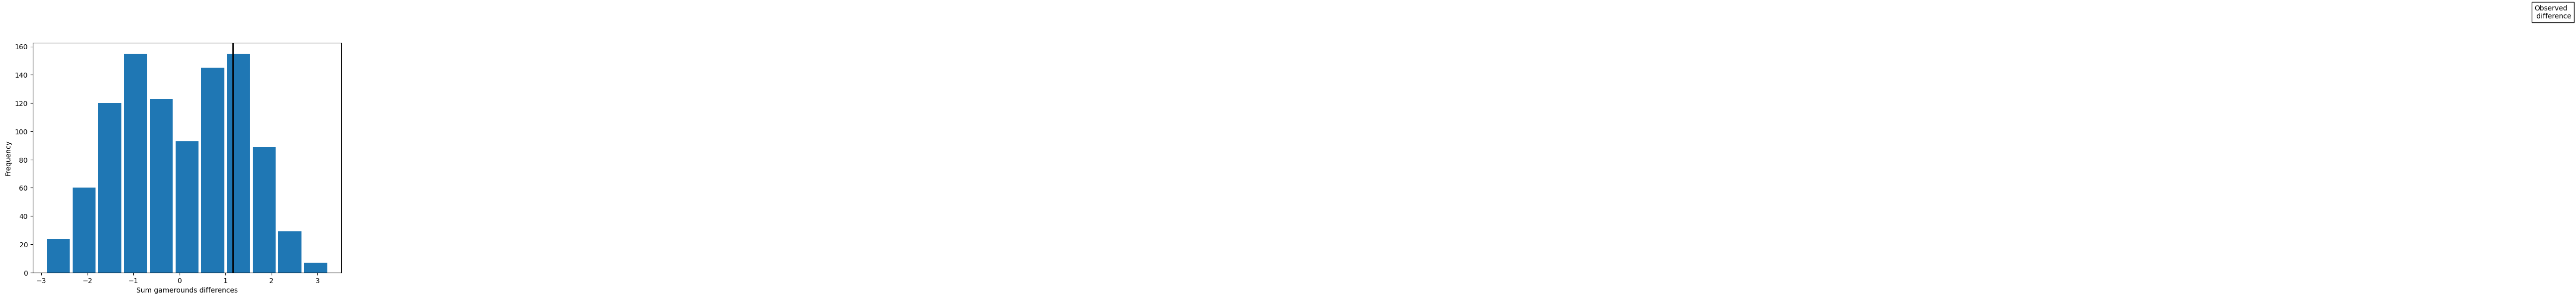

Probability of observing this difference by chance: 0.227


'\nBased on the derived probability (p-value) of 0.225, it seems that the difference in average \nsum of game rounds between the two versions is likely to be by chance rather than a real difference.\n\n\n'

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt


data = pd.read_csv("cookie_cats.csv")
print(data.head())

#Question1
#average sum of game rounds
average_gamerounds_by_version = data.groupby('version')['sum_gamerounds'].mean()
print(average_gamerounds_by_version)

best_version = average_gamerounds_by_version.idxmax()
print("Version with the highest average sum of game rounds:", best_version)

#Question2
def perm_fun(x, n_gate30, n_gate40):
    n = n_gate30 + n_gate40
    idx_B = set(random.sample(range(n), n_gate40))
    idx_A = set(range(n)) - idx_B
    return x.loc[list(idx_B)].mean() - x.loc[list(idx_A)].mean()

n_gate30 = len(data[data['version'] == 'gate_30'])
n_gate40 = len(data[data['version'] == 'gate_40'])


mean_class30 = data[data['version'] == 'gate_30']['sum_gamerounds'].mean()
mean_class40 = data[data['version'] == 'gate_40']['sum_gamerounds'].mean()
observed_diff = mean_class30 - mean_class40

# Perform permutation resampling
perm_diffs = [perm_fun(data['sum_gamerounds'], n_gate30, n_gate40) for _ in range(1000)]

#plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(perm_diffs, bins=11, rwidth=0.9)

# Plot the observed difference
ax.axvline(x=observed_diff, color='black', lw=2)
ax.text(observed_diff + 50, 180, 'Observed\n difference', bbox={'facecolor': 'white'})

ax.set_xlabel('Sum gamerounds differences')
ax.set_ylabel('Frequency')

plt.show()

p_value = np.mean(perm_diffs >= observed_diff)
print("Probability of observing this difference by chance:", p_value)

"""
Based on the derived probability (p-value) of 0.225, it seems that the difference in average 
sum of game rounds between the two versions is likely to be by chance rather than a real difference.


"""